In [8]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [2]:
tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks=tracks.droplevel(0,axis=1)
tracks.drop(index=tracks[tracks.subset=='large'].index, inplace=True)
tracks_cut=['composer','comments', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
            'favorites','listens','interest','bit_rate', 'duration','split','subset']
tracks.drop(tracks_cut,axis=1,inplace=True)

In [3]:
#estrazioni da librosa_mp3 di 10  secondi dopo i primi 10 features rolloff
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
ts.shape

(1028, 1209)

In [4]:
ts_df=pd.merge(tracks,ts, on='track_id')
ts_df.head()

,track_id,genre_top,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,4850,Classical,13,206,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,...,0.429477,0.438678,0.423448,0.416010,0.414990,0.434620,0.557168,0.779985,0.852099,0.806474
1,4851,Classical,14,207,0.139737,0.162770,0.188715,0.196280,0.222101,0.236519,...,0.100511,0.092096,0.077473,0.062344,0.058620,0.039428,0.035532,0.036547,0.003289,0.039476
2,5009,Old-Time / Historic,15,208,0.097878,0.141881,0.181742,0.295769,0.343891,0.415385,...,0.396982,0.354043,0.370011,0.368628,0.309365,0.282796,0.272292,0.276301,0.301752,0.270572
3,5012,Old-Time / Historic,16,209,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.263610,0.330493,0.367824,0.399824,0.282295
4,5013,Old-Time / Historic,17,210,0.134297,0.198303,0.286986,0.377489,0.289663,0.278561,...,0.469473,0.409380,0.320596,0.243092,0.350757,0.478701,0.517602,0.362054,0.187761,0.319275


In [5]:
cut_columns=['track_id','Unnamed: 0', 'Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)

In [6]:
ts.head()

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
0,0.203188,0.177222,0.170356,0.174893,0.181088,0.179945,0.180785,0.181348,0.175140,0.177304,...,0.429477,0.438678,0.423448,0.416010,0.414990,0.434620,0.557168,0.779985,0.852099,0.806474
1,0.139737,0.162770,0.188715,0.196280,0.222101,0.236519,0.235485,0.234684,0.237329,0.223463,...,0.100511,0.092096,0.077473,0.062344,0.058620,0.039428,0.035532,0.036547,0.003289,0.039476
2,0.097878,0.141881,0.181742,0.295769,0.343891,0.415385,0.524990,0.526107,0.438027,0.430539,...,0.396982,0.354043,0.370011,0.368628,0.309365,0.282796,0.272292,0.276301,0.301752,0.270572
3,0.088058,0.103542,0.167626,0.233723,0.334451,0.458624,0.421045,0.172120,0.230144,0.366459,...,0.291008,0.467978,0.473676,0.195546,0.092509,0.263610,0.330493,0.367824,0.399824,0.282295
4,0.134297,0.198303,0.286986,0.377489,0.289663,0.278561,0.435295,0.430005,0.354197,0.245915,...,0.469473,0.409380,0.320596,0.243092,0.350757,0.478701,0.517602,0.362054,0.187761,0.319275


## Lag Plot

Text(0.5, 1.0, 'Lag plot')

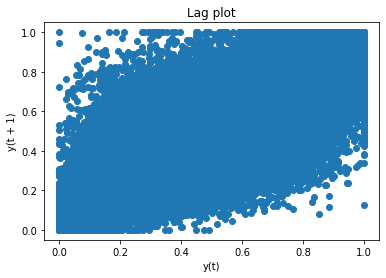

In [68]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(ts.T)
plt.title('Lag plot')

Text(0.5, 1.0, 'Autocorrelation plot')

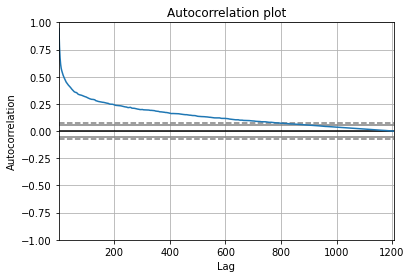

In [69]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts.T)
plt.title('Autocorrelation plot')

# Check genres

In [4]:
tracks[tracks['genre_top']=='Classical'].head()

,genre_top
track_id,
4850,Classical
4851,Classical
10026,Classical
10027,Classical
10028,Classical


In [7]:
index=tracks[tracks['genre_top']=='Old-Time / Historic'].index
print('Old Time / Historic tracks:', len(index))

Old Time / Historic tracks: 510


In [6]:
tracks[tracks['genre_top']=='Blues'].head(2)

,genre_top
track_id,
1042,Blues
1043,Blues


In [9]:
ts.head(5)

,Unnamed: 0,track_id,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,9,148,0.551802,0.704955,0.842342,0.993243,1.000000,0.977477,0.907658,0.833333,...,0.376126,0.378378,0.380631,0.380631,0.378378,0.378378,0.378378,0.387387,0.423423,0.378378
1,45,424,0.000000,0.125000,0.284091,0.198864,0.369318,0.414773,0.119318,0.551136,...,0.897727,0.670455,0.369318,0.443182,0.528409,0.522727,0.528409,0.670455,0.664773,0.539773
2,46,425,0.084706,0.209412,0.280000,0.110588,0.200000,0.209412,0.197647,0.202353,...,0.948235,0.908235,0.814118,0.637647,0.640000,0.505882,0.498824,0.423529,0.376471,0.472941
3,71,615,0.695122,0.402439,0.073171,0.085366,0.073171,0.073171,0.085366,0.024390,...,0.902439,0.646341,0.646341,0.756098,0.634146,0.646341,0.646341,0.621951,0.475610,0.609756
4,160,819,0.300885,0.345133,0.647788,0.902655,0.819469,0.739823,0.808850,0.672566,...,0.145133,0.201770,0.295575,0.281416,0.219469,0.198230,0.173451,0.161062,0.617699,0.819469


In [10]:
tracks.head(5)

,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
134,Hip-Hop


In [11]:
index=tracks[tracks['genre_top']=='Experimental'].index
print('Experimental tracks:',len(index))

Experimental tracks: 2251


In [5]:
# find index from track:id
ts_df.loc[ts_df.track_id == 4850]

NameError: name 'ts_df' is not defined

In [7]:
ts.loc[ts.track_id == 1042]

NameError: name 'ts' is not defined

In [8]:
cut_columns=['track_id','Unnamed: 0']
ts.drop(cut_columns, axis=1, inplace=True)

 ...]

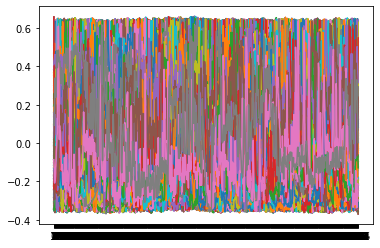

In [11]:
ts=ts-ts.mean()
plt.plot(ts.T)

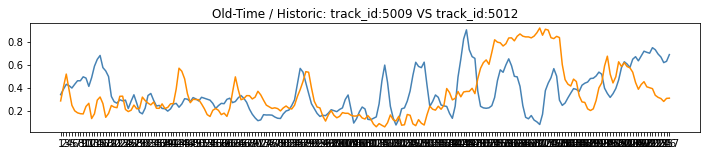

In [70]:
offset =1
win =217
ts1 = ts.iloc[15, offset:(offset+win)]
ts2 = ts.iloc[16, offset:(offset+win)]


# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(12,2))
plt.title('Old-Time / Historic: track_id:5009 VS track_id:5012')
#pyplot.grid(True)
plt.plot(ts1,color='steelblue')
plt.plot(ts2,color='darkorange')
plt.show()

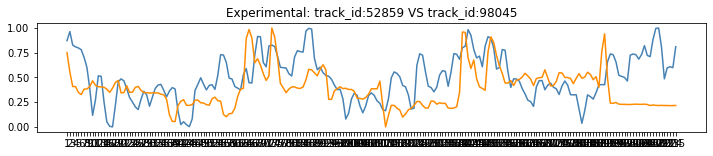

In [15]:
offset =1
win =217
ts1 = ts.iloc[573, offset:(offset+win)]
ts2 = ts.iloc[770, offset:(offset+win)]

# Amplitude Scaling
#ts1 = (ts - ts.mean()) / ts.std()
#ts2 = (ts2 - ts2.mean()) / ts2.std()

plt.figure(figsize=(12,2))
plt.title('Experimental: track_id:52859 VS track_id:98045')
#pyplot.grid(True)
plt.plot(ts1,color='steelblue')
plt.plot(ts2,color='darkorange')
plt.show()

# Old Time VS Experimental

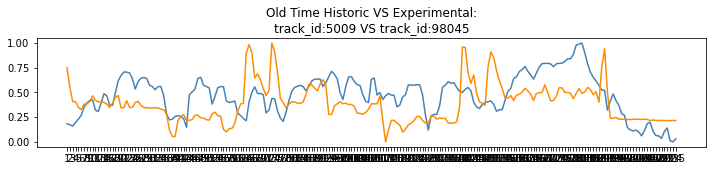

In [9]:
offset =1
win =217
ts1 = ts.iloc[15, offset:(offset+win)]
ts2 = ts.iloc[770, offset:(offset+win)]

plt.figure(figsize=(12,2))
plt.plot(ts1,color='steelblue')
plt.plot(ts2,color='darkorange')
#plt.xticks([])
plt.title('Old Time Historic VS Experimental:\n'
                     'track_id:5009 VS track_id:98045')


plt.show()

## Transformation I: Offset Translation

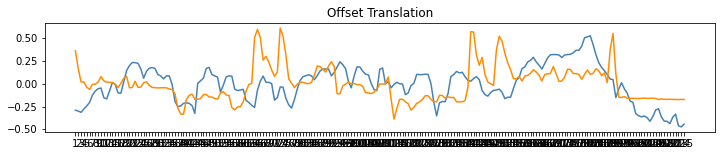

In [17]:
offset =1
win =217
ts1 = ts.iloc[15, offset:(offset+win)]
ts2 = ts.iloc[770, offset:(offset+win)]

plt.figure(figsize=(12,2))
plt.plot(ts1-ts1.mean(),color='steelblue')
plt.plot(ts2-ts2.mean(),color='darkorange')
#plt.xticks([])
plt.title('Offset Translation')

plt.show()

## Transformation II: Amplitude Scaling

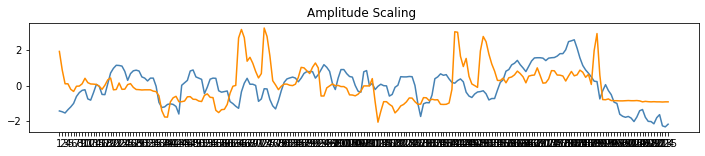

In [18]:
offset =1
win =217
ts1 = ts.iloc[15, offset:(offset+win)]
ts2 = ts.iloc[770, offset:(offset+win)]

plt.figure(figsize=(12,2))
plt.plot((ts1-ts1.mean())/ts1.std(),color='steelblue')
plt.plot((ts2-ts2.mean())/ts2.std(),color='darkorange')
#plt.xticks([])
plt.title('Amplitude Scaling ')

plt.show()

## Transformation III: Noise(smoothing)

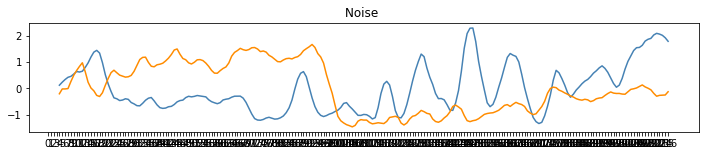

In [11]:
offset =1
win =217
w=5
ts1 = ts.iloc[15, offset:(offset+win)]
ts2 = ts.iloc[770, offset:(offset+win)]

plt.figure(figsize=(12,2))
plt.plot(((ts1-ts1.mean())/ts1.std()).rolling(window=w).mean(),color='steelblue')
plt.plot(((ts2-ts2.mean())/ts2.std()).rolling(window=w).mean(),color='darkorange')
#plt.xticks([])
plt.title('Noise ')

plt.show()

# Distance

In [20]:
from scipy.spatial.distance import euclidean, cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist

## Euclidean Distance

In [21]:
dist=euclidean(ts1,ts2)
dist

3.730007834493618

In [22]:
#calcolare distanza tra time con distanza maggiore(secondo il grafico)
dist=euclidean(ts1[:10],ts2[:10])
dist

0.7714564562412255

## Manhattan Distance

In [23]:
dist= cityblock(ts1,ts2)
dist

45.96273151237901

In [24]:
dist= cityblock(ts1[:10],ts2[:10])
dist

1.6798930563476562

## Dynamic Time Warping

In [25]:
dist=dtw(ts1,ts2)
dist

1.8368852021360873

In [26]:
dist=dtw(ts1[120:130],ts2[120:130])
dist

0.8399376315835673

In [27]:
path, dist = dtw_path(ts1[120:130],ts2[120:130])

In [28]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 3),
 (5, 3),
 (6, 4),
 (6, 5),
 (7, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

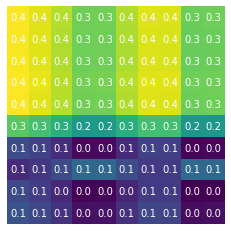

<Figure size 1440x1440 with 0 Axes>

In [29]:
mat = cdist(ts1.values[120:130].reshape(-1,1), ts2.values[120:130].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
plt.figure(figsize=(20,20))        
plt.show()

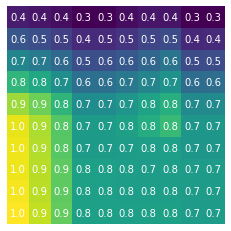

In [30]:
acc = subsequence_cost_matrix(ts1.values[120:130].reshape(-1,1), ts2.values[120:130].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

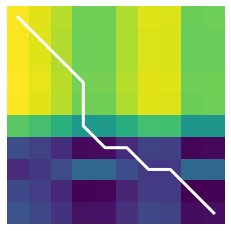

In [31]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [32]:
path, dist=dtw_path(ts1[120:130],ts2[120:130],global_constraint='sakoe_chiba',sakoe_chiba_radius=2)
dist

0.8399376315835673

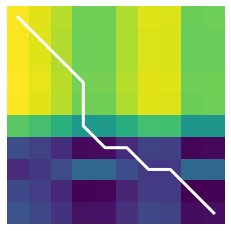

In [33]:
plt.imshow(mat)
plt.axis('off')
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [34]:
path, dist = dtw_path(ts1[120:130], ts2[120:130], global_constraint="itakura", itakura_max_slope=2.)
dist

0.8399376315835673

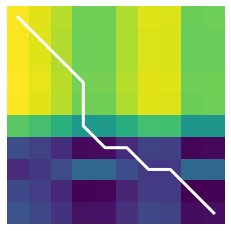

In [35]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

## Compression - based Distance

In [1]:
import zlib
import string

In [2]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [38]:
ts1_str = (' '.join([str(v) for v in ts1[:10]])).encode('utf-8')
ts1_str

b'0.1826697892271662 0.1733021077283372 0.1592505854800936 0.1967213114754098 0.2295081967213115 0.2693208430913347 0.3489461358313817 0.3934426229508196 0.4192037470725995 0.4262295081967213'

In [39]:
ts2_str = (' '.join([str(v) for v in ts2[:10]])).encode('utf-8')
ts2_str

b'0.7512953367875648 0.5544041450777202 0.4075993091537133 0.4075993091537133 0.3488773747841105 0.3264248704663213 0.3816925734024179 0.383419689119171 0.4075993091537133 0.466321243523316'

In [40]:
print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  376
len(compress(ts1_str+ts2_str)):  176
len(compress(ts1_str)):  104
len(compress(ts2_str)):  96
CDM =  0.88


In [41]:
ts1_str = (' '.join([str(v) for v in ts1])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  8055
len(compress(ts1_str+ts2_str)):  1943
len(compress(ts1_str)):  956
len(compress(ts2_str)):  967
CDM =  1.0104004160166407


# Time Series Approximation

In [71]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import dask.array as da

In [72]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) #(mu=0., std=1.)  # Rescale time series
ts_scaler= scaler.fit_transform(ts) #.values.reshape(1,-1))
ts1_scaler = scaler.fit_transform(ts1.values.reshape(1,-1))
ts2_scaler= scaler.fit_transform(ts2.values.reshape(1,-1))

In [13]:
scaler = TimeSeriesScalerMinMax()
ts_scaler2=scaler.fit_transform(ts).reshape(ts.shape[0], ts.shape[1])

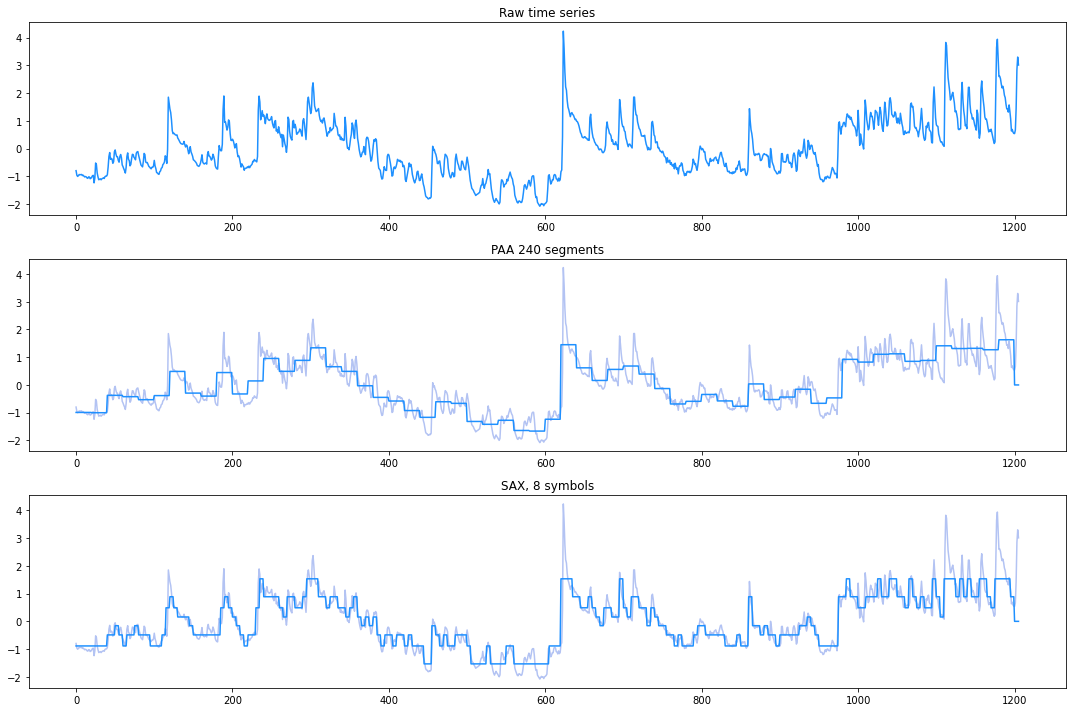

In [73]:
# First, raw time series
fig,ax=plt.subplots(3,1, figsize=(15,10))
ax[0].plot(ts_scaler[0], "dodgerblue")
ax[0].set_title("Raw time series")

ax[1].plot(ts_scaler[0].ravel(), "royalblue", alpha=0.4)
ax[1].plot(paa_dataset_inv[0].ravel(), "dodgerblue")
ax[1].set_title("PAA 240 segments")

ax[2].plot(ts_scaler[0].ravel(), "royalblue", alpha=0.4)
ax[2].plot(sax_dataset_inv[0].ravel(), "dodgerblue")
ax[2].set_title("SAX, %d symbols" % n_sax_symbols)

plt.tight_layout()
plt.show()

### PAA approximation

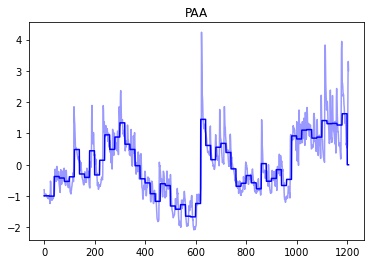

In [54]:
#PAA approximation raw ts
n_paa_segments = 60
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts_scaler)
paa_dataset_inv = paa.inverse_transform(ts_paa)

plt.plot(ts_scaler[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")
plt.show()

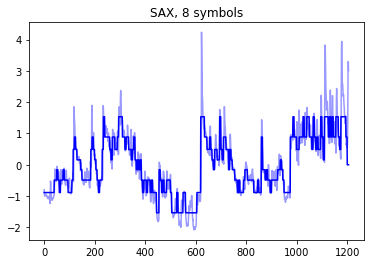

In [41]:
#SAX approximation raw ts
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts_scaler)
sax_dataset_inv = sax.inverse_transform(ts_sax)

plt.plot(ts_scaler[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)
plt.show()

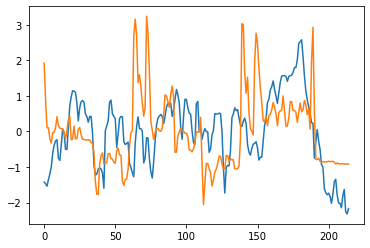

In [48]:
plt.plot(ts1_scaler[0].ravel())
plt.plot(ts2_scaler[0].ravel())
plt.show()

In [49]:
ts1_paa = paa.fit_transform(ts1_scaler)
ts2_paa = paa.fit_transform(ts2_scaler)

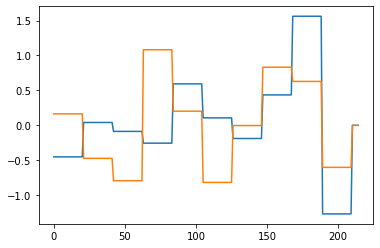

In [50]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [51]:
ts2_str = (' '.join([str(v) for v in ts2_paa[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  4229
len(compress(ts1_str+ts2_str)):  1074
len(compress(ts1_str)):  956
len(compress(ts2_str)):  118
CDM =  1.0
